# Data Modelling

## Load CSV data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("..\\data\\retail_sales_dataset.csv")

In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


## Model Selection

Regression Models: If predicting a continuous outcome like Total Amount.
Linear Regression
Decision Trees or Random Forests for more complex relationships.
Classification Models: If categorizing customers or transactions.
Logistic Regression
Decision Trees or Support Vector Machines (SVM).

## Linear Regression
Select dependent Y variable = 'Total amount' and independent X variable = 'Age', 'Quantity', 'Price per Unit'

In [5]:
# Define features (X) and target variable (y)
X = df[['Age', 'Quantity', 'Price per Unit']]  # You can add more features here
y = df['Total Amount']

# Split the Dataset

Split the dataset into training and testing sets.

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Create and Train the Linear Regression Model

Instantiate and fit the linear regression model.

In [7]:
# Create a linear regression model instance
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

Use the model to make predictions on the test set.

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Model

Evaluate the performance of your model using metrics like Mean Squared Error (MSE) and R-squared.
1. Mean Squared Error (MSE)
Value: 41896.21
Interpretation: The Mean Squared Error quantifies the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. In your case, an MSE of approximately 41896 suggests that, on average, the predictions deviate from the actual total amounts by about 204.70 (since 
41896
≈
204.70
41896
​
 ≈204.70). Depending on the scale of your target variable, you can assess whether this level of error is acceptable.
2. R-squared (R²)
Value: 0.857
Interpretation: R-squared measures the proportion of variance in the dependent variable (Total Amount) that can be explained by the independent variables (Age, Quantity, Price per Unit). An R² value of approximately 0.857 indicates that about 85.7% of the variance in Total Amount is explained by your model. This is generally considered a strong result, suggesting that your model fits the data well.

In [9]:
# Calculate Mean Squared Error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 41896.213221343576
R-squared: 0.8568772264250432


# Visualize Results

how well  model's predictions align with actual values.

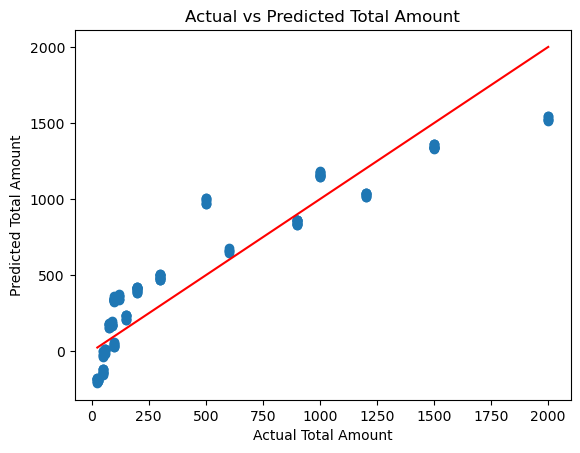

In [10]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Actual vs Predicted Total Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.show()